# Load and explore df

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 100)

In [ ]:
url = "https://drive.google.com/file/d/1JSY5fef1_9HlKZl1JRLTTa1kcxMNQA3Z/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isna().sum().tail(40)

CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

--> columns with Missing Values: 
- LotFrontag
- Alley 
- BsmtQual
- BsmtCond
- BsmtExposure      38
- BsmtFinType1      37
- BsmtFinType2      38
- Electrical         1
- PoolQC           1453
- Fence            1179
- MiscFeature      1406
- FireplaceQu       690
- GarageType         81
- GarageYrBlt        81
- GarageFinish       81
- GarageQual         81
- GarageCond         81

In [ ]:
df.duplicated().sum() # Boolean series1

0

In [ ]:
# df.hist(figsize= (10,10), bins=20)

In [ ]:
#df.describe()

In [ ]:
df.drop(['Id'], axis=1, inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Splitting and pipe branching

In [ ]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
147,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,...,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
676,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,...,N,0,0,90,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1304,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,...,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1372,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,253,170,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1427,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,...,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,70,RL,55.0,10592,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,Y,96,0,112,0,53,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1059,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,...,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
890,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,...,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal
628,60,RL,70.0,11606,Pave,NaN,IR1,HLS,AllPub,Inside,Sev,NAmes,Norm,Norm,1Fam,...,Y,335,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Family


In [ ]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
318,60,RL,90.0,9900,Pave,NaN,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,...,Y,340,60,144,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
580,20,RL,NaN,14585,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,...,Y,216,110,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
961,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,...,Y,550,282,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
78,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,...,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,60,RL,NaN,9130,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,Norm,1Fam,...,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1122,20,RL,NaN,8926,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,Y,64,0,0,0,160,0,NaN,MnPrv,NaN,0,10,2009,COD,Abnorml
1346,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,...,Y,0,80,0,290,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1406,85,RL,70.0,8445,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,...,Y,58,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal


# Baseline Models

## Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lr_full_pipeline = make_pipeline(preprocessor, 
                              LinearRegression())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"]
}

lr_search = GridSearchCV(lr_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

lr_search.fit(X_train, y_train)

lr_search.best_params_

print(
        f"""
        best_params_: {lr_search.best_params_}
        best_score_: {lr_search.best_score_}
        MSE: {mean_squared_error(y_test, lr_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, lr_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, lr_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(lr_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, lr_search.predict(X_test))}
        """
    )

# create a DataFrame to track performance of the models we try
performances = pd.DataFrame(columns=["r2_score"])

# add model performances to DataFrame
performances.loc["Baseline_ln_reg"] = r2_score(y_test, lr_search.predict(X_test))

performances

Fitting 5 folds for each of 2 candidates, totalling 10 fits

        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean'}
        best_score_: 0.7553252818198958
        MSE: 667488112.1581452
        RMSE: 25835.79130118033
        MAE: 16793.382699581376
        MAPE: 9.595493449984398
        R2 Score: 0.8919854855416322
        


,r2_score
Baseline_ln_reg,0.8919854855416322


## Decision Tree Regressor



In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2) 
}

dt_search = GridSearchCV(dt_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)

print(
        f"""
        best_score_: {dt_search.best_score_}
        best_params_: {dt_search.best_params_}
        MSE: {mean_squared_error(y_test, dt_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, dt_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, dt_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, dt_search.predict(X_test))}
        """
    )


# add model performances to DataFrame
performances.loc["Baseline_tree"] = r2_score(y_test, dt_search.predict(X_test))

performances

Fitting 5 folds for each of 60 candidates, totalling 300 fits

        best_score_: 0.7544910582654074
        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'decisiontreeregressor__max_depth': 6, 'decisiontreeregressor__min_samples_leaf': 3}
        MSE: 1739157175.1876652
        RMSE: 41703.20341637637
        MAE: 25760.10896003831
        MAPE: 13.729759163923031
        R2 Score: 0.7185654479488696
        


,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7185654479488696


## KNN


In [ ]:
# solution
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsRegressor()
                                 )


param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsregressor__n_neighbors": range(2, 6),
    "kneighborsregressor__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

knn_search.best_score_

print(
        f"""
        best_score_: {knn_search.best_score_}
        best_params_: {knn_search.best_params_}
        MSE: {mean_squared_error(y_test, knn_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, knn_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, knn_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(knn_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, knn_search.predict(X_test))}
        """
    )

# add model performances to DataFrame
performances.loc["Baseline_knn"] = r2_score(y_test, knn_search.predict(X_test))

performances

Fitting 5 folds for each of 16 candidates, totalling 80 fits

        best_score_: 0.657692874193913
        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'kneighborsregressor__n_neighbors': 5, 'kneighborsregressor__weights': 'distance'}
        MSE: 2669653626.4833117
        RMSE: 51668.690969322146
        MAE: 30435.657097334577
        MAPE: 16.596996969836784
        R2 Score: 0.5679902982777083
        


,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7185654479488696
Baseline_knn,0.5679902982777083


## Plot predictions


        MSE: 667488112.1581452
        RMSE: 25835.79130118033
        MAE: 16793.382699581376
        MAPE: 0.09896449274538406
        R_squared: 0.8919854855416322
        
477312.1213359168 58014.33027562933


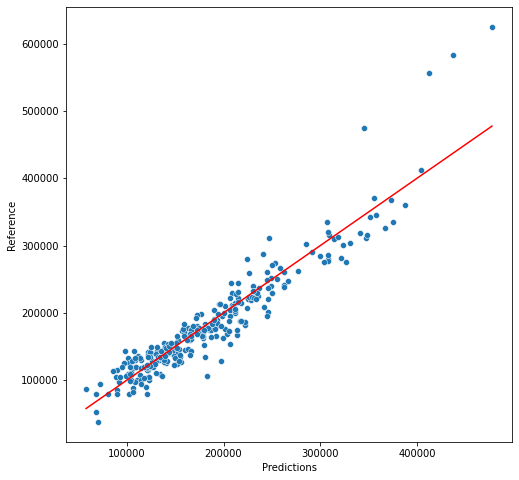

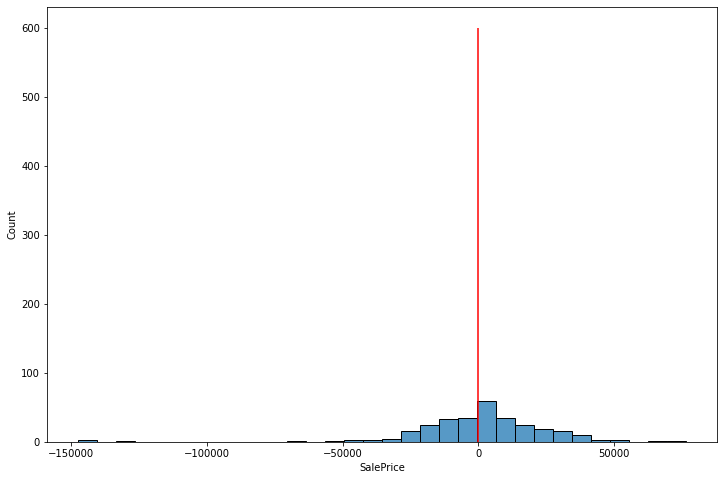

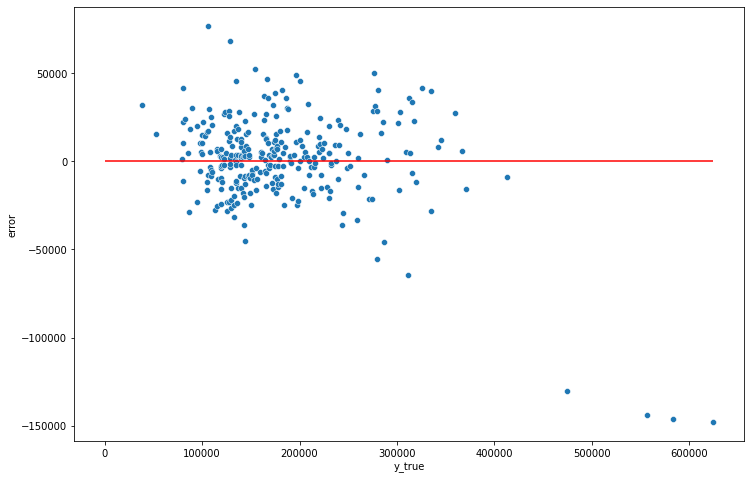

{'mse': 667488112.1581452,
 'rmse': 25835.79130118033,
 'mae': 16793.382699581376,
 'mape': 0.09896449274538406,
 'R squared': 0.8919854855416322}

In [ ]:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]


def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        R_squared: {r2_score(y_true, y_pred) }
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred),
        'R squared': r2_score(y_true, y_pred)
    }

    

# plot_predictions(y_test, results['predictions'])

plot_predictions(y_test, lr_search.predict(X_test))

# Feature Selection with K-Best

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

## without pipeline: Data preprocessing

### for X_train: 

In [ ]:
# selecting non-numerical columns
X_train_cat = X_train.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="N_A")

# fitting the imputer
cat_imputer.fit(X_train_cat)

# transforming the data & keeping it as a DataFrame
X_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train_cat), 
                             columns=X_train_cat.columns)
X_cat_imputed.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,N_A,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,N_A,N_A,N_A,WD,Normal
1,RL,Pave,N_A,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,N_A,N_A,N_A,WD,Normal
2,RL,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,...,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,N_A,N_A,N_A,WD,Normal
3,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Hip,CompShg,...,N,SBrkr,TA,Typ,N_A,N_A,N_A,N_A,N_A,Y,N_A,N_A,N_A,WD,Normal
4,RL,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,...,Y,SBrkr,TA,Typ,N_A,Attchd,Unf,TA,TA,Y,N_A,MnPrv,Shed,WD,Normal


In [ ]:
# Selecting numerical columns
X_train_num = X_train.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean")

# Fitting
num_imputer.fit(X_train_num)

# Transforming, keeping a DataFrame
X_num_imputed = pd.DataFrame(num_imputer.transform(X_train_num), 
                             columns=X_train_num.columns)

X_num_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,90.0,"9,900.0",7.0,5.0,"1,993.0","1,993.0",256.0,987.0,0.0,360.0,"1,347.0","1,372.0","1,274.0",0.0,...,1.0,9.0,1.0,"1,993.0",3.0,656.0,340.0,60.0,144.0,0.0,0.0,0.0,0.0,4.0,"2,009.0"
1,20.0,69.58426966292134,"14,585.0",6.0,6.0,"1,960.0","1,987.0",85.0,594.0,219.0,331.0,"1,144.0","1,429.0",0.0,0.0,...,1.0,7.0,2.0,"1,960.0",2.0,572.0,216.0,110.0,0.0,0.0,0.0,0.0,0.0,6.0,"2,007.0"
2,60.0,69.58426966292134,"12,227.0",6.0,7.0,"1,977.0","1,995.0",424.0,896.0,0.0,434.0,"1,330.0","1,542.0","1,330.0",0.0,...,1.0,11.0,1.0,"1,977.0",2.0,619.0,550.0,282.0,0.0,0.0,0.0,0.0,0.0,7.0,"2,008.0"
3,90.0,72.0,"10,778.0",4.0,5.0,"1,968.0","1,968.0",0.0,0.0,0.0,"1,768.0","1,768.0","1,768.0",0.0,0.0,...,2.0,8.0,0.0,"1,978.213442325159",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,"2,010.0"
4,50.0,85.0,"14,115.0",5.0,5.0,"1,993.0","1,995.0",0.0,732.0,0.0,64.0,796.0,796.0,566.0,0.0,...,1.0,5.0,0.0,"1,993.0",2.0,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,"2,009.0"


In [ ]:
# Concatenating all columns
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,N_A,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,1.0,9.0,1.0,"1,993.0",3.0,656.0,340.0,60.0,144.0,0.0,0.0,0.0,0.0,4.0,"2,009.0"
1,RL,Pave,N_A,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,1.0,7.0,2.0,"1,960.0",2.0,572.0,216.0,110.0,0.0,0.0,0.0,0.0,0.0,6.0,"2,007.0"
2,RL,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,...,1.0,11.0,1.0,"1,977.0",2.0,619.0,550.0,282.0,0.0,0.0,0.0,0.0,0.0,7.0,"2,008.0"
3,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Hip,CompShg,...,2.0,8.0,0.0,"1,978.213442325159",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,"2,010.0"
4,RL,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,...,1.0,5.0,0.0,"1,993.0",2.0,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,"2,009.0"


In [ ]:
# import
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder(handle_unknown="ignore")

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

In [ ]:
df = pd.DataFrame.sparse.from_spmatrix(X_cat_imputed_onehot)
df.head(200)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
198,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
colnames = my_onehot.get_feature_names_out(X_cat_imputed.columns)
df.columns = colnames
df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_N_A,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_imputed = pd.concat([df, X_num_imputed], axis=1)
X_imputed.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_N_A,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,9.0,1.0,"1,993.0",3.0,656.0,340.0,60.0,144.0,0.0,0.0,0.0,0.0,4.0,"2,009.0"
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,2.0,"1,960.0",2.0,572.0,216.0,110.0,0.0,0.0,0.0,0.0,0.0,6.0,"2,007.0"
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,11.0,1.0,"1,977.0",2.0,619.0,550.0,282.0,0.0,0.0,0.0,0.0,0.0,7.0,"2,008.0"


### for X_test: 

In [ ]:
# selecting non-numerical columns
X_test_cat = X_test.select_dtypes(exclude="number")

# transforming the data & keeping it as a DataFrame
X_cat_imputed_test = pd.DataFrame(cat_imputer.transform(X_test_cat), 
                             columns=X_test_cat.columns)
X_cat_imputed_test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,N_A,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,N_A,N_A,N_A,WD,Normal
1,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,...,N,SBrkr,TA,Min2,N_A,2Types,Unf,Fa,Fa,N,N_A,N_A,N_A,WD,Normal
2,RM,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,Gable,CompShg,...,Y,SBrkr,Gd,Maj1,N_A,Detchd,Unf,TA,TA,Y,N_A,N_A,N_A,WD,Normal
3,RL,Pave,N_A,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Y,SBrkr,Gd,Typ,TA,Detchd,RFn,TA,TA,Y,N_A,N_A,N_A,WD,Normal
4,RL,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,...,Y,FuseA,TA,Typ,TA,Attchd,Unf,TA,TA,Y,N_A,N_A,N_A,WD,Normal


In [ ]:
# Selecting numerical columns
X_test_num = X_test.select_dtypes(include="number")

# Transforming, keeping a DataFrame
X_num_imputed_test = pd.DataFrame(num_imputer.transform(X_test_num), 
                             columns=X_test_num.columns)

X_num_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,90.0,"9,900.0",7.0,5.0,"1,993.0","1,993.0",256.0,987.0,0.0,360.0,"1,347.0","1,372.0","1,274.0",0.0,...,1.0,9.0,1.0,"1,993.0",3.0,656.0,340.0,60.0,144.0,0.0,0.0,0.0,0.0,4.0,"2,009.0"
1,20.0,69.58426966292134,"14,585.0",6.0,6.0,"1,960.0","1,987.0",85.0,594.0,219.0,331.0,"1,144.0","1,429.0",0.0,0.0,...,1.0,7.0,2.0,"1,960.0",2.0,572.0,216.0,110.0,0.0,0.0,0.0,0.0,0.0,6.0,"2,007.0"
2,60.0,69.58426966292134,"12,227.0",6.0,7.0,"1,977.0","1,995.0",424.0,896.0,0.0,434.0,"1,330.0","1,542.0","1,330.0",0.0,...,1.0,11.0,1.0,"1,977.0",2.0,619.0,550.0,282.0,0.0,0.0,0.0,0.0,0.0,7.0,"2,008.0"
3,90.0,72.0,"10,778.0",4.0,5.0,"1,968.0","1,968.0",0.0,0.0,0.0,"1,768.0","1,768.0","1,768.0",0.0,0.0,...,2.0,8.0,0.0,"1,978.213442325159",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,"2,010.0"
4,50.0,85.0,"14,115.0",5.0,5.0,"1,993.0","1,995.0",0.0,732.0,0.0,64.0,796.0,796.0,566.0,0.0,...,1.0,5.0,0.0,"1,993.0",2.0,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,"2,009.0"


In [ ]:
# Concatenating all columns
X_imputed_test = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed_test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,N_A,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,1.0,9.0,1.0,"1,993.0",3.0,656.0,340.0,60.0,144.0,0.0,0.0,0.0,0.0,4.0,"2,009.0"
1,RL,Pave,N_A,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,1.0,7.0,2.0,"1,960.0",2.0,572.0,216.0,110.0,0.0,0.0,0.0,0.0,0.0,6.0,"2,007.0"
2,RL,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,...,1.0,11.0,1.0,"1,977.0",2.0,619.0,550.0,282.0,0.0,0.0,0.0,0.0,0.0,7.0,"2,008.0"
3,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Hip,CompShg,...,2.0,8.0,0.0,"1,978.213442325159",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,"2,010.0"
4,RL,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,...,1.0,5.0,0.0,"1,993.0",2.0,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,"2,009.0"


## without pipeline: feature selection using K-Best

In [ ]:
f_stat, p_val = f_regression(X_imputed, y_train)

f_test = pd.DataFrame({"f_stat":f_stat, 
                       "p_val":p_val}, 
                      index= X_imputed.columns)

f_test.sort_values("f_stat", ascending=False).tail(40)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


,f_stat,p_val
SaleType_ConLw,0.39025510779345457,0.5322875567567988
MiscVal,0.3870255359944392,0.5339886915009846
PoolQC_Fa,0.38187982407344745,0.5367195769432433
YrSold,0.3408796674132845,0.5594348253359227
Exterior1st_Stucco,0.31131500919036487,0.576981471181608
Condition2_RRAn,0.3026565689438823,0.5823271310174225
RoofMatl_Roll,0.301345120996027,0.5831454786857952
Utilities_AllPub,0.2944897317867912,0.5874613728025413
Utilities_NoSeWa,0.2944897317864561,0.5874613728028699
LandSlope_Sev,0.2928602589104075,0.5884967861072843


In [ ]:
KBest = SelectKBest(score_func=f_regression, k=50)

In [ ]:
# transform train set
train_X_KBest = KBest.fit_transform(X_imputed, y_train)

# transform test set
test_X_KBest = KBest.transform(X_imputed_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Alley
- BldgType
- BsmtCond
- BsmtExposure
- BsmtFinType1
- ...
Feature names seen at fit time, yet now missing:
- Alley_Grvl
- Alley_N_A
- Alley_Pave
- BldgType_1Fam
- BldgType_2fmCon
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
print(train_X_KBest.shape, test_X_KBest.shape)

In [ ]:
# Linear Regression: 
ln_reg =  LinearRegression()
ln_reg.fit(train_X_KBest, y_train)
ln_reg_pred = ln_reg.predict(test_X_KBest)

# Decision tree
tree = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 3) # initialize
tree.fit(train_X_KBest, y_train)
tree_pred = tree.predict(test_X_KBest)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
neigh.fit(train_X_KBest, y_train) # fit to train set
knn_pred = neigh.predict(test_X_KBest)

# add model performances to DataFrame
performances.loc["Kbest_ln_reg_K(50)"] = r2_score(y_test, ln_reg_pred)
performances.loc["Kbest_tree_K(50)"] = r2_score(y_test, tree_pred)
performances.loc["Kbest_knn_K(50)"] = r2_score(y_test, knn_pred)

performances

## with pipeline

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
preprocessor.fit(X_train)

X_train_fs = preprocessor.transform(X_train)
X_test_fs = preprocessor.transform(X_test)


df_X_train_fs = pd.DataFrame.sparse.from_spmatrix(X_train_fs)
df_X_test_fs = pd.DataFrame.sparse.from_spmatrix(X_test_fs)
df_X_test_fs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,60.0,69.58426966292134,"9,505.0",7.0,5.0,"2,001.0","2,001.0",180.0,0.0,0.0,884.0,884.0,884.0,"1,151.0",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,70.0,60.0,"9,600.0",4.0,2.0,"1,900.0","1,950.0",0.0,0.0,0.0,"1,095.0","1,095.0","1,095.0",679.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,160.0,32.0,"3,363.0",7.0,5.0,"2,004.0","2,004.0",117.0,0.0,0.0,976.0,976.0,976.0,732.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,75.0,"9,750.0",7.0,6.0,"1,998.0","1,998.0",0.0,975.0,0.0,133.0,"1,108.0","1,108.0",989.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50.0,60.0,"10,930.0",5.0,6.0,"1,945.0","1,950.0",0.0,580.0,0.0,333.0,913.0,"1,048.0",510.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
f_stat, p_val = f_regression(df_X_train_fs, y_train)

f_test = pd.DataFrame({"f_stat":f_stat, 
                       "p_val":p_val}, 
                      )

f_test.sort_values("f_stat", ascending=False).head(5)

,f_stat,p_val
3,"1,922.8241644052803",6.412489107954967e-249
15,"1,077.8983548947886",5.993905924457524e-168
25,806.2173932920747,3.081969607416334e-135
26,743.6139773432225,4.6418868463238265e-127
12,728.031522839617,5.546746994655028e-125


In [ ]:
KBest = SelectKBest(score_func=f_regression, k=150)

# transform train set
train_X_KBest = KBest.fit_transform(X_train_fs, y_train)

# transform test set
test_X_KBest = KBest.transform(X_test_fs)

print(train_X_KBest.shape, test_X_KBest.shape)

(1168, 150) (292, 150)


In [ ]:
# linear regression
from sklearn.pipeline import Pipeline 


kbest = SelectKBest(score_func= f_regression)

lr_full_pipeline = Pipeline([('preprocessor', preprocessor), ('kbest', kbest), ('lr', LinearRegression())]) 

param_grid = {"kbest__k": range(290, 293, 1)}


lr_search = GridSearchCV(lr_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

lr_search.fit(X_train, y_train)


print(
        f"""
        best_k : {lr_search.best_params_}
        best_score_: {lr_search.best_score_}
        MSE: {mean_squared_error(y_test, lr_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, lr_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, lr_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(lr_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, lr_search.predict(X_test))}
        """
    )

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)



        best_k : {'kbest__k': 292}
        best_score_: 0.7681366034988865
        MSE: 669721839.165132
        RMSE: 25878.984507996676
        MAE: 16904.04878047384
        MAPE: 9.753921266208302
        R2 Score: 0.8916240185226734
        


In [ ]:
#  Decision Tree
dt_full_pipeline = Pipeline([('preprocessor', preprocessor), ('kbest', kbest), ('dtree', DecisionTreeRegressor())]) 

param_grid = {
    "dtree__max_depth": range(4, 10, 1),
    "dtree__min_samples_leaf": range(3, 8, 1), 
    "kbest__k": range(85, 120, 3)
}


dt_search = GridSearchCV(dt_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)

dt_search.best_score_

dt_search.best_params_

print(
        f"""
        best_k : {dt_search.best_params_}
        best_score_: {dt_search.best_score_}
        MSE: {mean_squared_error(y_test, dt_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, dt_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, dt_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, dt_search.predict(X_test))}
        """
    )
 

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: i


        best_k : {'dtree__max_depth': 7, 'dtree__min_samples_leaf': 5, 'kbest__k': 112}
        best_score_: 0.7634301051947274
        MSE: 1745600672.2241533
        RMSE: 41780.38621439674
        MAE: 25460.767007452418
        MAPE: 13.596392337459658
        R2 Score: 0.7175227459274659
        


In [ ]:
#  KNN
knn_full_pipeline = Pipeline([('preprocessor', preprocessor), ('kbest', kbest), ('knn', KNeighborsRegressor())]) 

param_grid = {
    "knn__n_neighbors": range(3, 6),
    "knn__weights": ["uniform", "distance"],
    "kbest__k": range(25, 35, 2)
}


knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)




print(
        f"""
        best_k : {knn_search.best_params_}
        best_score_: {knn_search.best_score_}
        MSE: {mean_squared_error(y_test, knn_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, knn_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, knn_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(knn_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, knn_search.predict(X_test))}
        """
    )
 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: i


        best_k : {'kbest__k': 31, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
        best_score_: 0.698058117562611
        MSE: 1583137758.1317809
        RMSE: 39788.66368869129
        MAE: 24515.604109589043
        MAPE: 12.823135065806996
        R2 Score: 0.7438128812325595
        


In [ ]:
performances.loc["Kbest_ln_reg_GS"] = r2_score(y_test, lr_search.predict(X_test))
performances.loc["Kbest_tree_GS"] = r2_score(y_test, dt_search.predict(X_test))
performances.loc["Kbest_knn_GS"] = r2_score(y_test, knn_search.predict(X_test))

performances

,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7185654479488696
Baseline_knn,0.5679902982777083
Kbest_ln_reg_GS,0.8916240185226734
Kbest_tree_GS,0.7175227459274659
Kbest_knn_GS,0.7438128812325595


In [ ]:
y = list(range(1,4))
y

[1, 2, 3]

In [ ]:
len(range(95,111,2))

8

In [ ]:
# Random Forest
rf_full_pipeline = make_pipeline(preprocessor, SelectKBest(score_func=f_regression, k=150), 
                              RandomForestRegressor())

param_grid = {
    "randomforestregressor__min_samples_leaf": [1,2], # maybe go higher, default in R is 5 
    "randomforestregressor__min_samples_split": [7, 8,9],
    "randomforestregressor__max_features": ["auto"], 
    "randomforestregressor__n_estimators": [200],
    "selectkbest__k": [165, 170, 175]
}

rf_search = GridSearchCV(rf_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1,
                      scoring="neg_root_mean_squared_error")

rf_search.fit(X_train, y_train)

rf_search.best_score_

rf_search.best_params_

print(
        f"""
        best_k : {rf_search.best_params_}
        best_score_: {rf_search.best_score_}
        MSE: {mean_squared_error(y_test, rf_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, rf_search.predict(X_test)) **0.5}
        RMSE: {mean_squared_error(y_test, rf_search.predict(X_test), squared=False)}
        RMSE_log:{mean_squared_log_error(y_test, rf_search.predict(X_test), squared=False)}
        MAE: {mean_absolute_error(y_test, rf_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(rf_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, rf_search.predict(X_test))}
        """
    )

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: i


        best_k : {'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 8, 'randomforestregressor__n_estimators': 150, 'selectkbest__k': 170}
        best_score_: -32034.460238931468
        MSE: 770748181.5293766
        RMSE: 27762.351873164072
        RMSE: 27762.351873164072
        RMSE_log:0.13141647536089426
        MAE: 16702.235889296328
        MAPE: 8.96161009557229
        R2 Score: 0.8752756954301516
        


# Submission

In [ ]:
submission = pd.DataFrame(columns=["Id", "SalePrice"])

In [ ]:
url = "https://drive.google.com/file/d/1fOdT7-Nev6wWiOfynV3dy7RDR4rOSE69/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data =  pd.read_csv(path)

In [ ]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
submission['Id'] = test_data['Id'] 

In [ ]:
submission

,Id,SalePrice
0,1461,NaN
1,1462,NaN
2,1463,NaN
3,1464,NaN
4,1465,NaN
...,...,...
1454,2915,NaN
1455,2916,NaN
1456,2917,NaN
1457,2918,NaN


In [ ]:
test_data.drop(['Id'], axis=1, inplace=True)

In [ ]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,...,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,...,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,...,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,...,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,...,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
pred = rf_search.predict(test_data)

In [ ]:
submission['SalePrice'] = pred

In [ ]:
submission

,Id,SalePrice
0,1461,"128,964.92317867318"
1,1462,"156,391.08358308361"
2,1463,"182,174.50316429598"
3,1464,"179,471.2712930984"
4,1465,"202,499.74016182232"
...,...,...
1454,2915,"84,262.84358276644"
1455,2916,"84,160.14503263928"
1456,2917,"152,869.30344258918"
1457,2918,"114,381.09158037732"


In [ ]:
#submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
submission.to_csv('submission_init.csv', index=False) 
files.download('submission_init.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>